In [2]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

### 데이터 로드 - Titanic dataset 사용

* 앙상블의 과정이 어려워서 나름대로 쉽게 이해하기 위하여 어려운 데이터보다는 간단한 데이터를 사용해 처음부터 끝까지 정리해보고 싶어서 선택하였습니다. 

In [101]:
train = pd.read_csv('Titanic/train.csv')
test = pd.read_csv('Titanic/test.csv')

In [47]:
#데이터의 shape 확인
print(train.shape, test.shape)

(891, 12) (418, 11)


## 1. EDA & Data Processing

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터 설명

1. PassengerID : 승객번호
2. Survived : 생존여부(0 : 죽음, 1: 생존) -----> 타겟변수
3. Pclass : 객실등급 (1 = 1등실, 2 = 2등실, 3 = 3등실)
4. Name : 승객이름
5. Sex : 성별
6. Age	: 나이
7. SibSp : 타이타닉 호에 탑승 한 형제 자매 / 배우자 수
8. Parch : 타이타닉 호에 탑승 한 부모 / 자녀 수
9. Ticket : 티켓번호
10. Fare : 여객 운임
11. Cabin : 객실 번호
12. Embarked : 승선항(C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [102]:
#EDA와 전처리를 위해 train과 test를 결합하여 data를 만들어준다.
#test에는 'Survived'가 없어서 큰값으로 준 다음에 합친다.
#(큰값으로 주는 이유 : 마지막에 다시 train과 test를 나눌때 쉽게하기위함)

test['Survived'] = 1000
data = pd.concat([train, test], axis=0)

In [78]:
#잘합쳐졌나 확인
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1000,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1000,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,1000,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,1000,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [50]:
#결측치 확인
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

* Age,Cabin,Embarked에 결측치가 있다는 것을 생각하면서 각각의 변수들을 시각화 해보려한다.

In [103]:
#결측치가 월등히 많은 Cabin변수는 제거
data.drop(['Cabin'], axis=1,inplace = True)
#의미없는 PassengerId도 제거 
data.drop(['PassengerId'], axis=1,inplace = True)
#의미없는 Ticket도 제거 
data.drop(['Ticket'], axis=1,inplace = True)

* 타켓변수인 Survived에 대한 시각화진행
* 시각화를 진행할때에는 train data만 사용하고 변수를 변경하거나 결측치를 처리할때는 train과 test를 합친 data에 적용해준다.

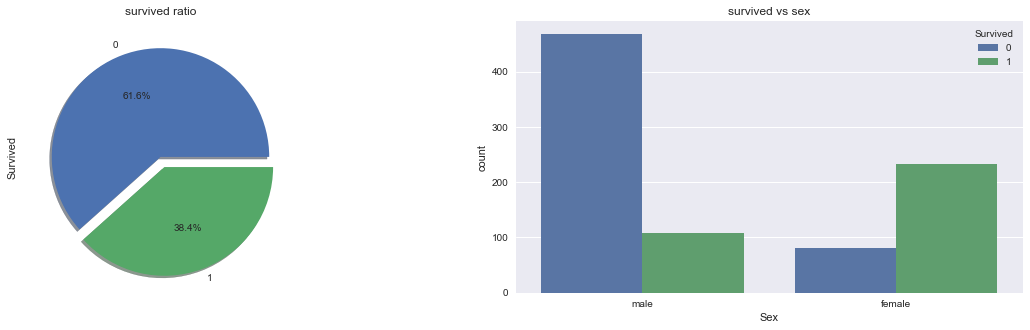

In [44]:
f,ax = plt.subplots(1,2, sharex=True, sharey=True,figsize=(20,5))
 
#생존자 비율 확인    
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax = ax[0],shadow=True)
ax[0].set_title('survived ratio')

#성별에 따른 생존자 확인
ax[1] = plt.subplot(1,2,2)
ax[1] = sns.countplot('Sex',hue='Survived',data=train)
ax[1].set_title('survived vs sex')

plt.show()

* 생존자보다 죽은사람이 더 많고, 남자의 수가 훨씬 많음에도 여자의 생존자수가 더 많다.

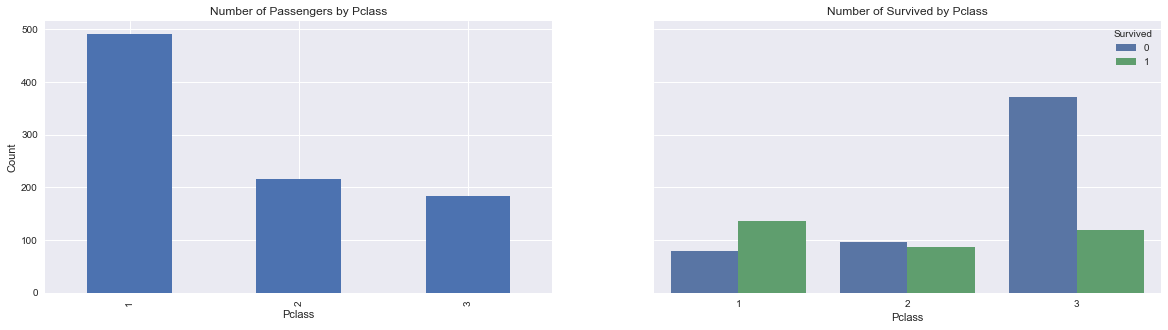

In [45]:
f,ax = plt.subplots(1,2, sharex=True, sharey=True,figsize=(20,5))

#Pclass확인
train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of Passengers by Pclass')

#Pclass별로 생존자 확인
sns.countplot('Pclass', hue='Survived', data=train ,ax=ax[1])
ax[1].set_ylabel('Count')
ax[1].set_title('Number of Survived by Pclass')
plt.show()

* 1등실 사람들이 많았고 3등실사람들이 가장 많이 죽었다.

In [104]:
#Name의 카테고리 확인
data['Name'].unique() 

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [106]:
#카데고리가 너무많아서 Mr,Mrs,Miss와 같은 호칭들만 추출해서 사용
data['title'] = data['Name'].str.extract('([A-Za-z]+)\.') #뒤에 '.'이 붙어있는 단어를 찾아서 title에 저장 

In [108]:
#원래 Name변수 삭제
data.drop(['Name'], axis=1,inplace = True)

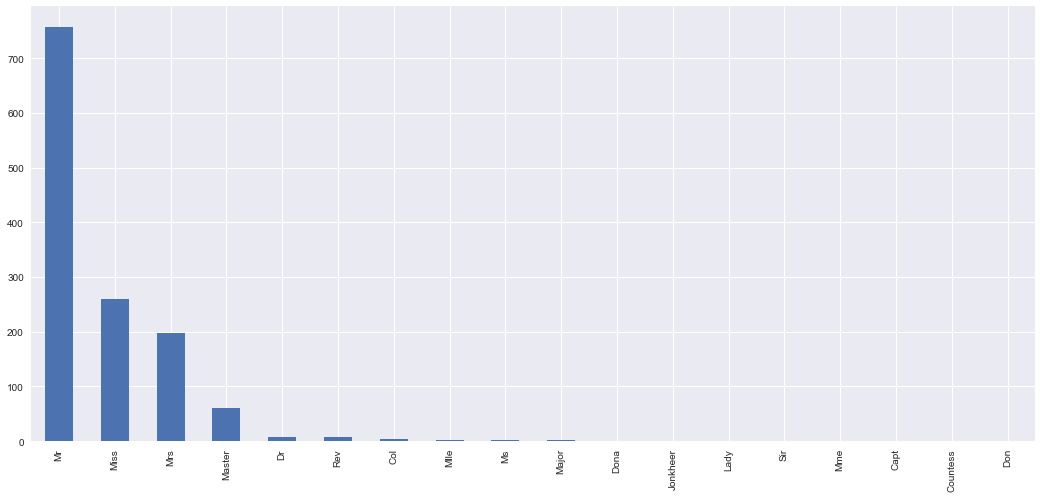

In [109]:
data['title'].value_counts().plot.bar(figsize=(18,8))

* 제일 많이 나온 Mr,Miss,Mrs,Master와 나머지를 else로 만들어서 사용할것 이다.

In [111]:
data['title'].replace(['Dr','Rev','Col','Mlle','Ms','Major','Dona','Jonkheer','Lady','Sir','Mme','Capt','Countess', 'Don'],
                      ['else','else','else','else','Miss','else','else','else','Mrs','Mr','else','else','else','else'],inplace=True)

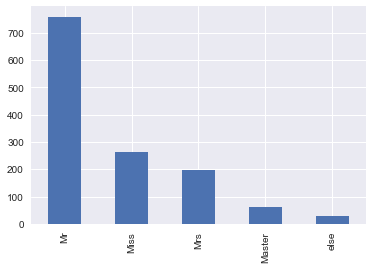

In [140]:
#잘 바뀌었나 그래프 다시그려서 확인
data['title'].value_counts().plot.bar()

In [150]:
#Age 변수 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

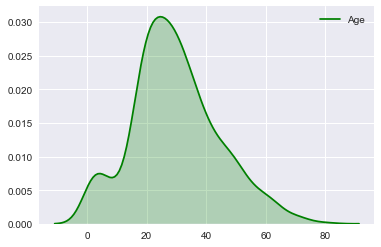

In [152]:
sns.kdeplot(train['Age'], shade=True, color="g")

* 20~40대가 높은 비중을 차지하고 있다.
* 바로위에서 사용했던 호칭(title)과 age가 관계가 있으므로 title의 평균값을 이용해서 age의 결측값을 채워줄것이다!
* https://pbj0812.tistory.com/242

In [154]:
data.groupby(['title'])['Age'].mean()

title
Master     5.419344
Miss      21.647290
Mr        32.215699
Mrs       37.050505
else      42.733333
Name: Age, dtype: float64

In [119]:
data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 1309, dtype: bool

In [120]:
data.loc[(data['Age'].isnull()) & (data['title'] == 'Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['title'] == 'Miss'), 'Age'] = 21
data.loc[(data['Age'].isnull()) & (data['title'] == 'Mr'), 'Age'] = 32
data.loc[(data['Age'].isnull()) & (data['title'] == 'Mrs'), 'Age'] = 37
data.loc[(data['Age'].isnull()) & (data['title'] == 'else'), 'Age'] = 42

In [121]:
#결측치 처리가 잘되었나 확인
data['Age'].isnull().sum()

0

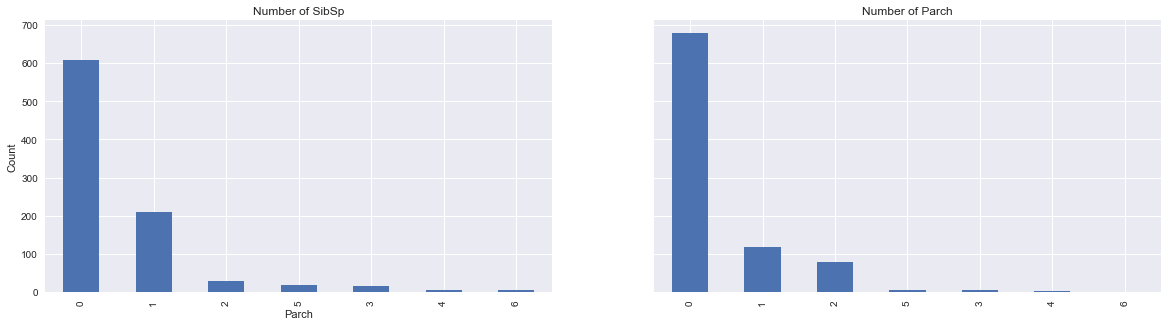

In [129]:
#'SibSp'과 'Parch' 변수 확인
f,ax = plt.subplots(1,2, sharex=True, sharey=True,figsize=(20,5))

train['SibSp'].value_counts().plot.bar(ax=ax[0])
ax[0].set_xlabel('SibSp')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of SibSp')


train['Parch'].value_counts().plot.bar(ax=ax[1])
ax[0].set_xlabel('Parch')
ax[1].set_ylabel('Count')
ax[1].set_title('Number of Parch')
plt.show()

* 형재자매와 배우자가 없는 경우가 가장 많았고, 부모와 자식없이 혼자 탑승한 사람들이 제일 많은것을 알 수 있다.

In [136]:
#Fare 변수 확인
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

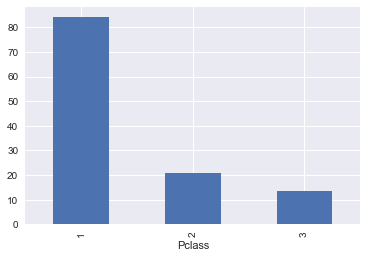

In [141]:
#객실별로 운임요금이 다를것이라 예상되어 Pclass별로 Fare를 그려보았다.
train.groupby(["Pclass"])["Fare"].mean().plot.bar()

* 예상대로 1등실의 운임요금이 가장비싼것을 알 수있다. 

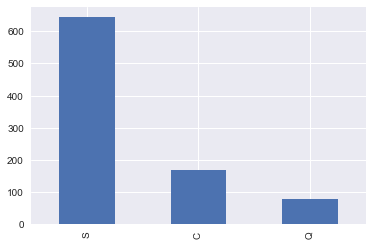

In [139]:
#Embarked변수 확인
train['Embarked'].value_counts().plot.bar()

* 'S'값이 가장 많이 나온 것을 확인할 수 있다.

In [147]:
#Embarked에 결측값이 있는것을 확인하였다. 그렇기에 가장 많이 나온 'S'로 결측값을 대체해줄것이다.
data.loc[data['Embarked'].isnull(), 'Embarked'] = 'S'

In [158]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
413,1000,3,male,32.0,0,0,8.0500,S,Mr
414,1000,1,female,39.0,0,0,108.9000,C,else
415,1000,3,male,38.5,0,0,7.2500,S,Mr
416,1000,3,male,32.0,0,0,8.0500,S,Mr


* 결측치 처리는 다하였고 이제 Pclass,Sex,Embarked,title을 더미화 시켜줄것이다.

In [159]:
data = pd.get_dummies(data,columns=['Pclass','Sex','Embarked','title'])

In [160]:
#더미화 잘되었나 확인
data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_else
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1000,32.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0,0
414,1000,39.0,0,0,108.9000,1,0,0,1,0,1,0,0,0,0,0,0,1
415,1000,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0
416,1000,32.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0,0


In [162]:
#train과 test를 다시 나눈다.
train2 = data[data['Survived'] != 1000]
test2 = data[data['Survived'] == 1000]

In [164]:
#구별을 위해 만들어 놓았던 Survived변수를 지워준다.
test2.drop(['Survived'], axis=1,inplace = True)

In [166]:
#데이터의 shape 다시 확인 -- 더미변수때문에 변수는 늘어났지만 개수는 똑같다.
print(train2.shape, test2.shape)

(891, 18) (418, 17)


## 2. Classifier Modeling  

In [364]:
# sklearn 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [171]:
#타겟값을 분리
X = train2.drop(["Survived"], axis=1)
y = train2["Survived"]

In [221]:
#train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)#정렬되어있는 데이터를 섞어준다!

### Ensemble1 : AdaBoost
첫번째 과제에서 사용해보지 않아서 시도해보았다.(Boosting 1개, Bagging 1개, Stacking 1개 해볼예정이다!)
* 가중치를 부여하면서 부스팅을 하는 대표적인 알고리즘
* 분류를 위해 많은 약분류기(하나의 노드와 두 개의 잎만있는 트리)를 결합
* base모델이 약한 트리모델이기 때문에 병렬처리가 불가하다는 단점
* 가중치를 부여하는 알고리즘이기 때문에 Weight가 낮은 데이터 주위에 높은 weight를 가진 데이터가 있으면 잘못분류어 성능이 크게 떨어질 수 있다

#### Parameters
    
base_estimator : 앙상블이 구축되기 위한 기본모델, default=None(DecisionTreeClassifier(max_depth=1))

n_estimators : 부스팅이 종료되는 최대수, default=50

learning_rate : 학습률, default=1

random_stateint or RandomState : 부스팅 반복에서 각 base_estimator에 주어진 랜덤 시드를 제어, default=None


In [373]:
#먼저 base_estimator를 None으로 했을떄의 성능을 살펴보았다(DT의 max_depth를 바꾸어서 해보았지만 none이 가장 좋게나왔다!)

ada = AdaBoostClassifier(
    base_estimator=None, n_estimators=100,
    learning_rate=0.1, random_state=318)

In [374]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [375]:
#rmse가 아닌 accuracy_score로 시도해보았다.
acc = accuracy_score(y_test, y_pred)
print("\nAdaBoost accuracy_score: {:.4f}\n".format(acc))


AdaBoost accuracy_score: 0.8321



In [225]:
#Grid Search를 통해 최적의 parameters를 찾아보자!
n_estimators = [100,150,200,250,300,350,400,450,500];
learning_rate = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_rate}

gs = GridSearchCV(AdaBoostClassifier(base_estimator= None,
                                     ),
                                 param_grid=parameters,
                                 cv=5, scoring = 'accuracy',
                                 n_jobs = -1)
gs.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='accuracy')

In [226]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'learning_rate': 0.5, 'n_estimators': 450}


In [403]:
gs_ada = AdaBoostClassifier(
    base_estimator=None, n_estimators=450,
    learning_rate=0.5, random_state=318)

In [404]:
gs_ada.fit(X_train, y_train)
ada_pred = gs_ada.predict(X_test)

In [405]:
acc = accuracy_score(y_test, ada_pred)
print("\ngs_AdaBoost accuracy_score: {:.4f}\n".format(acc))


gs_AdaBoost accuracy_score: 0.8396



* 튜닝을 한것이 아주 조금 좋아졌다..!

### Ensemble2 : Random Forest
* Bagging 모델 중 한개
* 결정트리 모델이 모여서 숲을 이루는 방식
* 배깅보다 무작위성을 강조 --> 분산을 낮추어 전체적으로 모델이 좋아진다 

#### Parameters

n_estimators : 나무의 수, default=100

max_features : 최상의 분할을 할때 고려해야할 기능 수, int or float가 들어가면 각분할에서 feature를 고려한다, default ="auto"

max_depth : 나무의 최대깊이, default = None

In [425]:
rf = RandomForestClassifier(n_estimators=100,
                              max_features=2,
                              n_jobs=-1, oob_score=True)

In [426]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [427]:
acc = accuracy_score(y_test, y_pred)
print("\nRandomForest accuracy_score: {:.4f}\n".format(acc))


RandomForest accuracy_score: 0.8433



In [429]:
#Grid Search를 통해 최적의 parameters를 찾아보자!
parameters ={ "n_estimators" : [10, 20, 30, 50, 100, 200],
          "max_features" : [1,3,5,7, 10, 15, 20, 25, 30],
          #"max_depth" : [None, 6, 9, 12]
            }

gs = GridSearchCV(estimator =rf,
                  param_grid=parameters, 
                  cv=10, scoring = 'accuracy',
                  n_jobs=-1)

gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=2, n_jobs=-1,
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'max_features': [1, 3, 5, 7, 10, 15, 20, 25, 30],
                         'n_estimators': [10, 20, 30, 50, 100, 200]},
             scoring='accuracy')

In [430]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'max_features': 10, 'n_estimators': 30}


In [437]:
gs_rf = RandomForestClassifier(n_estimators=30,
                              max_features=10,
                              n_jobs=-1, oob_score=True)

In [438]:
gs_rf.fit(X_train, y_train)
rf_pred = gs_rf.predict(X_test)

In [439]:
acc = accuracy_score(y_test, rf_pred)
print("\ngs_RandomForest accuracy_score: {:.4f}\n".format(acc))


gs_RandomForest accuracy_score: 0.8545



* RandomForest accuracy_score: 0.8433 --> gs_RandomForest accuracy_score: 0.8545
정확도 값이 올랐다!

### Ensemble 3 : Basic Stacking
여러개의 개별모델을 단순하게 합쳐서 예측하는 stacking기법

* 개별 모델들 2개이상을 만들어 train data를 사용해 학습시킨다.
* 각 모델마다 X_test 를 넣어서 예측 후 모델 별 predict를 얻는다.
* 다시 3개의 predict 값을 학습 데이터로 사용한다.
* 최종 모델을 만들어서 개별모델들로 부터 얻었던 predict 값을 학습 데이터로 학습 시킨다.
* 최종 평가

위에서 만들었던 gs_ada, gs_rf와 밑에나와있는 knn,df,dt를 활용하여 basic stacking을 진행해볼 것이다.

#### KNN

In [445]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [446]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [447]:
acc = accuracy_score(y_test, knn_pred)
print("\nKNN accuracy_score: {:.4f}\n".format(acc))


KNN accuracy_score: 0.7612



* 지금까지 나온 정확도중에 제일 낮다

In [443]:
#Grid Search를 통해 최적의 parameters를 찾아보자!
param_grid = {'n_neighbors': [1, 3, 4, 5, 7,8, 9, 10]} # 이웃의 수, default =5

gs= GridSearchCV(KNeighborsClassifier(), 
                      param_grid=param_grid, 
                      cv=10, scoring = 'accuracy',
                      verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.1s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 4, 5, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [444]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'n_neighbors': 3}


* 처음에 아무거나 넣고 돌린 knn의 parameter값이 최적이라 나왔다. knn은 titanic data에 잘맞지 않는 것 같다!

#### DECISION TREE

In [448]:
dt = DecisionTreeClassifier(max_depth=10)

In [449]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [450]:
acc = accuracy_score(y_test, y_pred)
print("\nDecisionTree Classifier accuracy_score: {:.4f}\n".format(acc))


DecisionTree Classifier accuracy_score: 0.7612



In [347]:
#Grid Search를 통해 최적의 parameters를 찾아보자!
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
param_grid = {
    'max_depth': [3,4,5,6], #트리의 최대깊이, default = 없음
    'min_samples_leaf': min_samples_leafs #리프 노드에 필요한 최소 샘플 수, default = 1
}
    
gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10, n_jobs=-1,verbose=2)
        #verbose : 자세한 정도를 제어, 높을수록 더 많은 메시지가 표시
gs.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])},
             verbose=2)

In [348]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'max_depth': 3, 'min_samples_leaf': 0.1}


In [451]:
gs_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 0.1)

In [452]:
gs_dt.fit(X_train, y_train)
dt_pred = gs_dt.predict(X_test)

In [476]:
acc = accuracy_score(y_test, dt_pred)
print("\ngs_DecisionTree Classifier accuracy_score: {:.4f}\n".format(acc))


gs_DecisionTree Classifier accuracy_score: 0.8022



* 0.7612 --> 0.8022 꽤많이 올랐지만 좋은 모델은 아닌듯 싶다!

#### basic stacking 진행

In [469]:
new_data = np.array([knn_pred,ada_pred,rf_pred]) #튜닝을 진행하여 정확도가 증가하였던 모델의 예측값들이다.
new_data.shape

(3, 268)

In [470]:
new_data = np.transpose(new_data)
new_data.shape

(268, 3)

In [475]:
#y_test.shape 다시 학습하여야하기 때문에 shpae을 맞춰주어야한다!

(268,)

In [473]:
dt.fit(new_data,y_test)
y_pred =dt.predict(new_data)
# 예측값으로 실제값을 예측한다.

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

정확도 : 0.8694


- 각 모델별로 가장 높은 정확도가 나온 적어보자면 

gs_AdaBoost accuracy_score: 0.8396

gs_RandomForest accuracy_score: 0.8545

KNN accuracy_score: 0.7612

gs_DecisionTree Classifier accuracy_score: 0.8022

basic stacking accuracy_score : 0.8694

stacking을 진행한 것이 성능이 가장 좋게나왔다.